In [1]:
import numpy as np
from pypianoroll import Multitrack, Track
from matplotlib import pyplot as plt

# Create a piano-roll matrix, where the first and second axes represent time
# and pitch, respectively, and assign a C major chord to the piano-roll
pianoroll = np.zeros((96, 128))
C_maj = [60, 64, 67, 72, 76, 79, 84]
pianoroll[0:95, C_maj] = 100

# Create a `pypianoroll.Track` instance
track = Track(pianoroll=pianoroll, program=0, is_drum=False,
              name='my awesome piano')

# Plot the piano-roll
fig, ax = track.plot()
plt.show()


<Figure size 640x480 with 1 Axes>

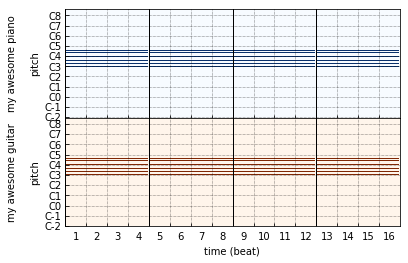

In [2]:
# Extend the piano-roll to demonstrate the usage of down beat array
track.pianoroll = np.tile(track.pianoroll, (4, 1))
downbeats = [0, 96, 192, 288]

# Copy the track to demonstrate the usage of `pypianoroll.Multitrack`
another_track = track.copy()
another_track.program = 24
another_track.name = 'my awesome guitar'

# Create a `pypianoroll.Multitrack` instance
multitrack = Multitrack(tracks=[track, another_track], tempo=120.0,
                        downbeat=[0, 96, 192, 288], beat_resolution=24)

# Plot the multi-track piano-roll
fig, axs = multitrack.plot()
plt.show()

In [3]:
# Save the `pypianoroll.Multitrack` instance to a .npz file
multitrack.save('./test.npz')

# Load the .npz file to a `pypianoroll.Multitrack` instance
loaded = Multitrack('./test.npz')

In [4]:
# Parse a MIDI file to a `pypianoroll.Multitrack` instance
another_multitrack = Multitrack('midi/Scales/C Major.mid')

# Write the `pypianoroll.Multitrack` instance to a MIDI file
#another_multitrack.write('./test.mid')

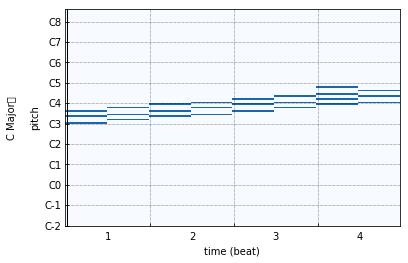

In [5]:
fig, axs = another_multitrack.plot()
plt.show()

In [6]:
another_multitrack.tracks

[Track(pianoroll=array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), program=0, is_drum=False, name=C Major )]

In [12]:
another_multitrack.save('test.npz')

In [13]:
nppiano = np.load('test.npz')

In [14]:
nppiano

In [15]:
nppiano[0]

KeyError: '0 is not a file in the archive'

In [12]:
another_multitrack

Multitrack(tracks=['C Major\x00'], tempo=array([120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120.]), downbeat=array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, F

In [23]:
len(another_multitrack.tempo)

2520

In [25]:
tempo = another_multitrack.tempo

In [26]:
tempo

array([120., 120., 120., ..., 120., 120., 120.])

In [36]:
tempo[0:2520]

array([120., 120., 120., ..., 120., 120., 120.])

In [7]:
track = another_multitrack.tracks

In [8]:
track = track.pianoroll

AttributeError: 'list' object has no attribute 'pianoroll'

In [11]:
len(track[0].pianoroll)

96

In [18]:
track[0].pianoroll[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 100,   0,   0,   0, 100,
         0,   0, 100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [17]:
for i in range(len(track[0].pianoroll)):
    if track[0].pianoroll[i][60] == track[0].pianoroll[0][60]:
        print("True")

True
True
True
True
True
True
True
True
True
True
True
True
